## Provenance graph creation with voprov

#### Introduction

This notebook gives the sequence of commands to create a provenance graph for the processing of images taken at a telescope, for which we applied a bias and dark subtraction, then a flat-fielding to finally stack the images.

#### Installation

Python package:
https://github.com/sanguillon/voprov/

Based on the prov Python package:
https://github.com/trungdong/prov

```bash
pip install voprov prov==1.5.3
```

*Important*: the option "use_labels=True" of prov_to_dot() may not work if the ProvDocument contains Bundles

---

In [1]:
from voprov.models.model import VOProvDocument, VOProvBundle, VOPROV, PROV

In [2]:
pdoc = VOProvDocument()
pdoc.set_default_namespace(VOPROV.uri)

Define 3 images taken by an instrument as entities:

In [3]:
pdoc.add_namespace('obs', 'http://myobservatory.com/instrument#');
im1 = pdoc.entity('obs:image1.fits', other_attributes={'prov:label': "image"});
im2 = pdoc.entity('obs:image2.fits', other_attributes={'prov:label': "image"});
im3 = pdoc.entity('obs:image3.fits', other_attributes={'prov:label': "image"});

Define calibration files as additional entities:

In [4]:
bias = pdoc.entity('obs:bias.fits', other_attributes={'prov:label': "bias"});
dark = pdoc.entity('obs:dark.fits', other_attributes={'prov:label': "dark"});
flat = pdoc.entity('obs:flat.fits', other_attributes={'prov:label': "flat"});

Define agents:

In [5]:
pdoc.add_namespace('staff', 'http://myobservatory.com/staff#');
pdoc.agent('staff:Emma', email="emma@myobservatory.com");
pdoc.agent('staff:Charles', email="georges@myobservatory.com");

In [6]:
pdoc.wasAttributedTo(im1, 'staff:Emma');
pdoc.wasAttributedTo(im2, 'staff:Emma');
pdoc.wasAttributedTo(im3, 'staff:Emma');
pdoc.wasAttributedTo(bias, 'staff:Charles');
pdoc.wasAttributedTo(dark, 'staff:Charles');
pdoc.wasAttributedTo(flat, 'staff:Charles');

In [7]:
print(pdoc.get_provn())

document
  default <http://www.ivoa.net/documents/ProvenanceDM/index.html#>
  prefix prov <http://www.w3.org/ns/prov#>
  prefix xsd <http://www.w3.org/2001/XMLSchema#>
  prefix xsi <http://www.w3.org/2001/XMLSchema-instance>
  prefix voprov <http://www.ivoa.net/documents/ProvenanceDM/index.html#>
  prefix obs <http://myobservatory.com/instrument#>
  prefix staff <http://myobservatory.com/staff#>
  
  entity(obs:image1.fits, [prov:label="image"])
  entity(obs:image2.fits, [prov:label="image"])
  entity(obs:image3.fits, [prov:label="image"])
  entity(obs:bias.fits, [prov:label="bias"])
  entity(obs:dark.fits, [prov:label="dark"])
  entity(obs:flat.fits, [prov:label="flat"])
  agent(staff:Emma, [voprov:email="emma@myobservatory.com"])
  agent(staff:Charles, [voprov:email="georges@myobservatory.com"])
  wasAttributedTo(obs:image1.fits, staff:Emma)
  wasAttributedTo(obs:image2.fits, staff:Emma)
  wasAttributedTo(obs:image3.fits, staff:Emma)
  wasAttributedTo(obs:bias.fits, staff:Charles)
  

In [8]:
from voprov.visualization.dot import prov_to_dot
dot = prov_to_dot(pdoc, use_labels=True)  # Important: remove "use_labels=True" in case of error
dot.write_png('voprov_example.png')

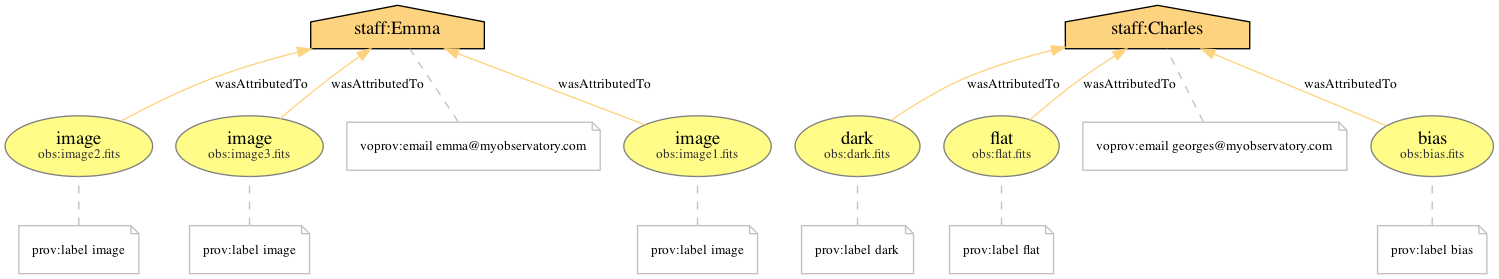

In [9]:
from IPython.display import Image
Image('voprov_example.png')

We first define a type of activity with the following description:

In [10]:
pdoc.add_namespace('ps', 'http://myobservatory.com/processes/');
bundle_bias = pdoc.bundle('#description#bias_subtraction');
act_bias = bundle_bias.activityDescription(
    'ps:bias_subtraction', 
    'bias_subtraction', 
    description="remove the readout noise of the detector from the input image by subtracting a bias image"
);

Let's add an activity:

In [11]:
act1 = pdoc.activity('ps:245931', name="bias_subtraction", activityDescription=act_bias);

The activity takes an image and the bias as an input:

In [12]:
act1.used(im1, attributes={'prov:role': "image"});
act1.used(bias, attributes={'prov:role': "bias"});

And generates a bias-subtracted image:

In [13]:
im1b = pdoc.entity('obs:image1b.fits')
im1b.wasGeneratedBy(act1);

Defining similar activities:

In [14]:
# activity 2 for im2
act2 = pdoc.activity('ps:245932', name="bias_subtraction", activityDescription=act_bias);
act2.used(im2, attributes={'prov:role': "image"});
act2.used(bias, attributes={'prov:role': "bias"});
im2b = pdoc.entity('obs:image2b.fits')
im2b.wasGeneratedBy(act2);
# activity 3 for im3
act3 = pdoc.activity('ps:245933', name="bias_subtraction", activityDescription=act_bias);
act3.used(im3, attributes={'prov:role': "image"});
act3.used(bias, attributes={'prov:role': "bias"});
im3b = pdoc.entity('obs:image3b.fits')
im3b.wasGeneratedBy(act3);

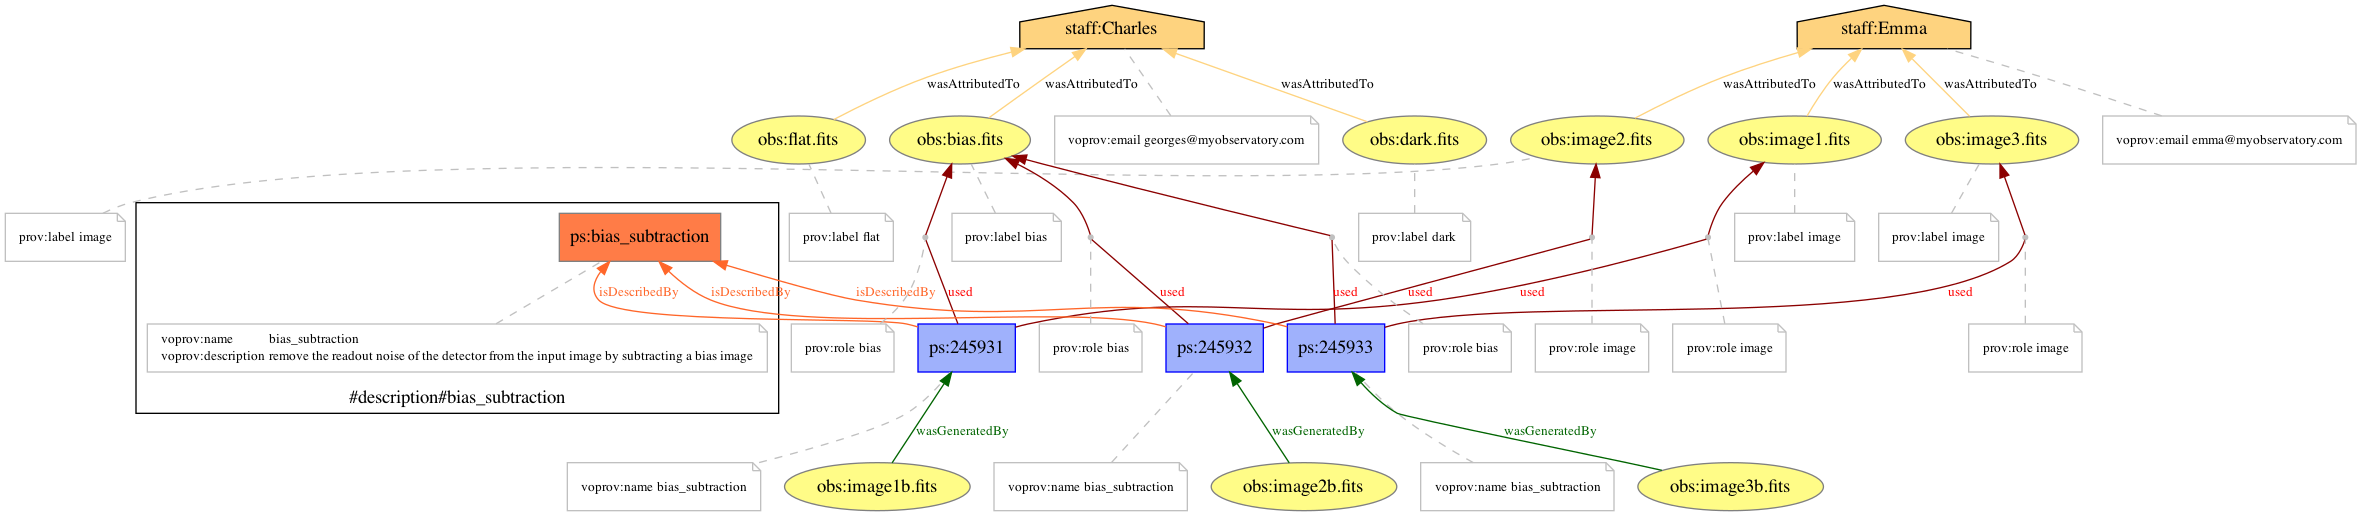

In [15]:
# Show graph
dot = prov_to_dot(pdoc)  #, use_labels=True)  # Important: remove "use_labels=True" in case of error
dot.write_png('voprov_example.png')
Image('voprov_example.png')

In [16]:
# Show PROV-JSON file
pdoc.serialize('voprov_example.json', format='json')
print(pdoc.serialize(indent=4))

{
    "prefix": {
        "prov": "http://www.w3.org/ns/prov#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "xsi": "http://www.w3.org/2001/XMLSchema-instance",
        "voprov": "http://www.ivoa.net/documents/ProvenanceDM/index.html#",
        "obs": "http://myobservatory.com/instrument#",
        "staff": "http://myobservatory.com/staff#",
        "ps": "http://myobservatory.com/processes/",
        "default": "http://www.ivoa.net/documents/ProvenanceDM/index.html#"
    },
    "entity": {
        "obs:image1.fits": {
            "prov:label": "image"
        },
        "obs:image2.fits": {
            "prov:label": "image"
        },
        "obs:image3.fits": {
            "prov:label": "image"
        },
        "obs:bias.fits": {
            "prov:label": "bias"
        },
        "obs:dark.fits": {
            "prov:label": "dark"
        },
        "obs:flat.fits": {
            "prov:label": "flat"
        },
        "obs:image1b.fits": {},
        "obs:image2b.f

In [17]:
# Show PROV-XML file
pdoc.serialize('voprov_example.xml', format='xml')

We now define another type of activity for dark subtraction:

In [18]:
bundle_dark = pdoc.bundle('#description#dark_subtraction');
act_dark = bundle_dark.activityDescription(
    'ps:dark_subtraction', 
    'dark_subtraction', 
    description="remove the electronic noise of the detector from the input image by subtracting a dark image"
);

In [19]:
# activity 1b for im1b
act1b = pdoc.activity('ps:945781', name="dark_subtraction", activityDescription=act_dark);
act1b.used(im1b, attributes={'prov:role': "image"});
act1b.used(dark, attributes={'prov:role': "dark"});
im1bd = pdoc.entity('obs:image1bd.fits')
im1bd.wasGeneratedBy(act1b);
# activity 2b for im2b
act2b = pdoc.activity('ps:945782', name="dark_subtraction", activityDescription=act_dark);
act2b.used(im2b, attributes={'prov:role': "image"});
act2b.used(dark, attributes={'prov:role': "dark"});
im2bd = pdoc.entity('obs:image2bd.fits')
im2bd.wasGeneratedBy(act2b);
# activity 3b for im3b
act3b = pdoc.activity('ps:945783', name="dark_subtraction", activityDescription=act_dark);
act3b.used(im3b, attributes={'prov:role': "image"});
act3b.used(dark, attributes={'prov:role': "dark"});
im3bd = pdoc.entity('obs:image3bd.fits')
im3bd.wasGeneratedBy(act3b);

And another type of activity for flat application:

In [20]:
bundle_flat = pdoc.bundle('#description#flat_application');
act_flat = bundle_flat.activityDescription(
    'ps:flat_application', 
    'flat_application', 
    description="Applies flat-field correction to the input image"
);

In [21]:
# activity 1bd for im1bd
act1bd = pdoc.activity('ps:635451', name="flat_application", activityDescription=act_flat);
act1bd.used(im1bd, attributes={'prov:role': "image"});
act1bd.used(flat, attributes={'prov:role': "flat"});
im1bdf = pdoc.entity('obs:image1bdf.fits')
im1bdf.wasGeneratedBy(act1bd);
# activity 2bd for im2bd
act2bd = pdoc.activity('ps:635452', name="flat_application", activityDescription=act_flat);
act2bd.used(im2bd, attributes={'prov:role': "image"});
act2bd.used(flat, attributes={'prov:role': "flat"});
im2bdf = pdoc.entity('obs:image2bdf.fits')
im2bdf.wasGeneratedBy(act2bd);
# activity 3bd for im3bd
act3bd = pdoc.activity('ps:635453', name="flat_application", activityDescription=act_flat);
act3bd.used(im3bd, attributes={'prov:role': "image"});
act3bd.used(flat, attributes={'prov:role': "flat"});
im3bdf = pdoc.entity('obs:image3bdf.fits')
im3bdf.wasGeneratedBy(act3bd);

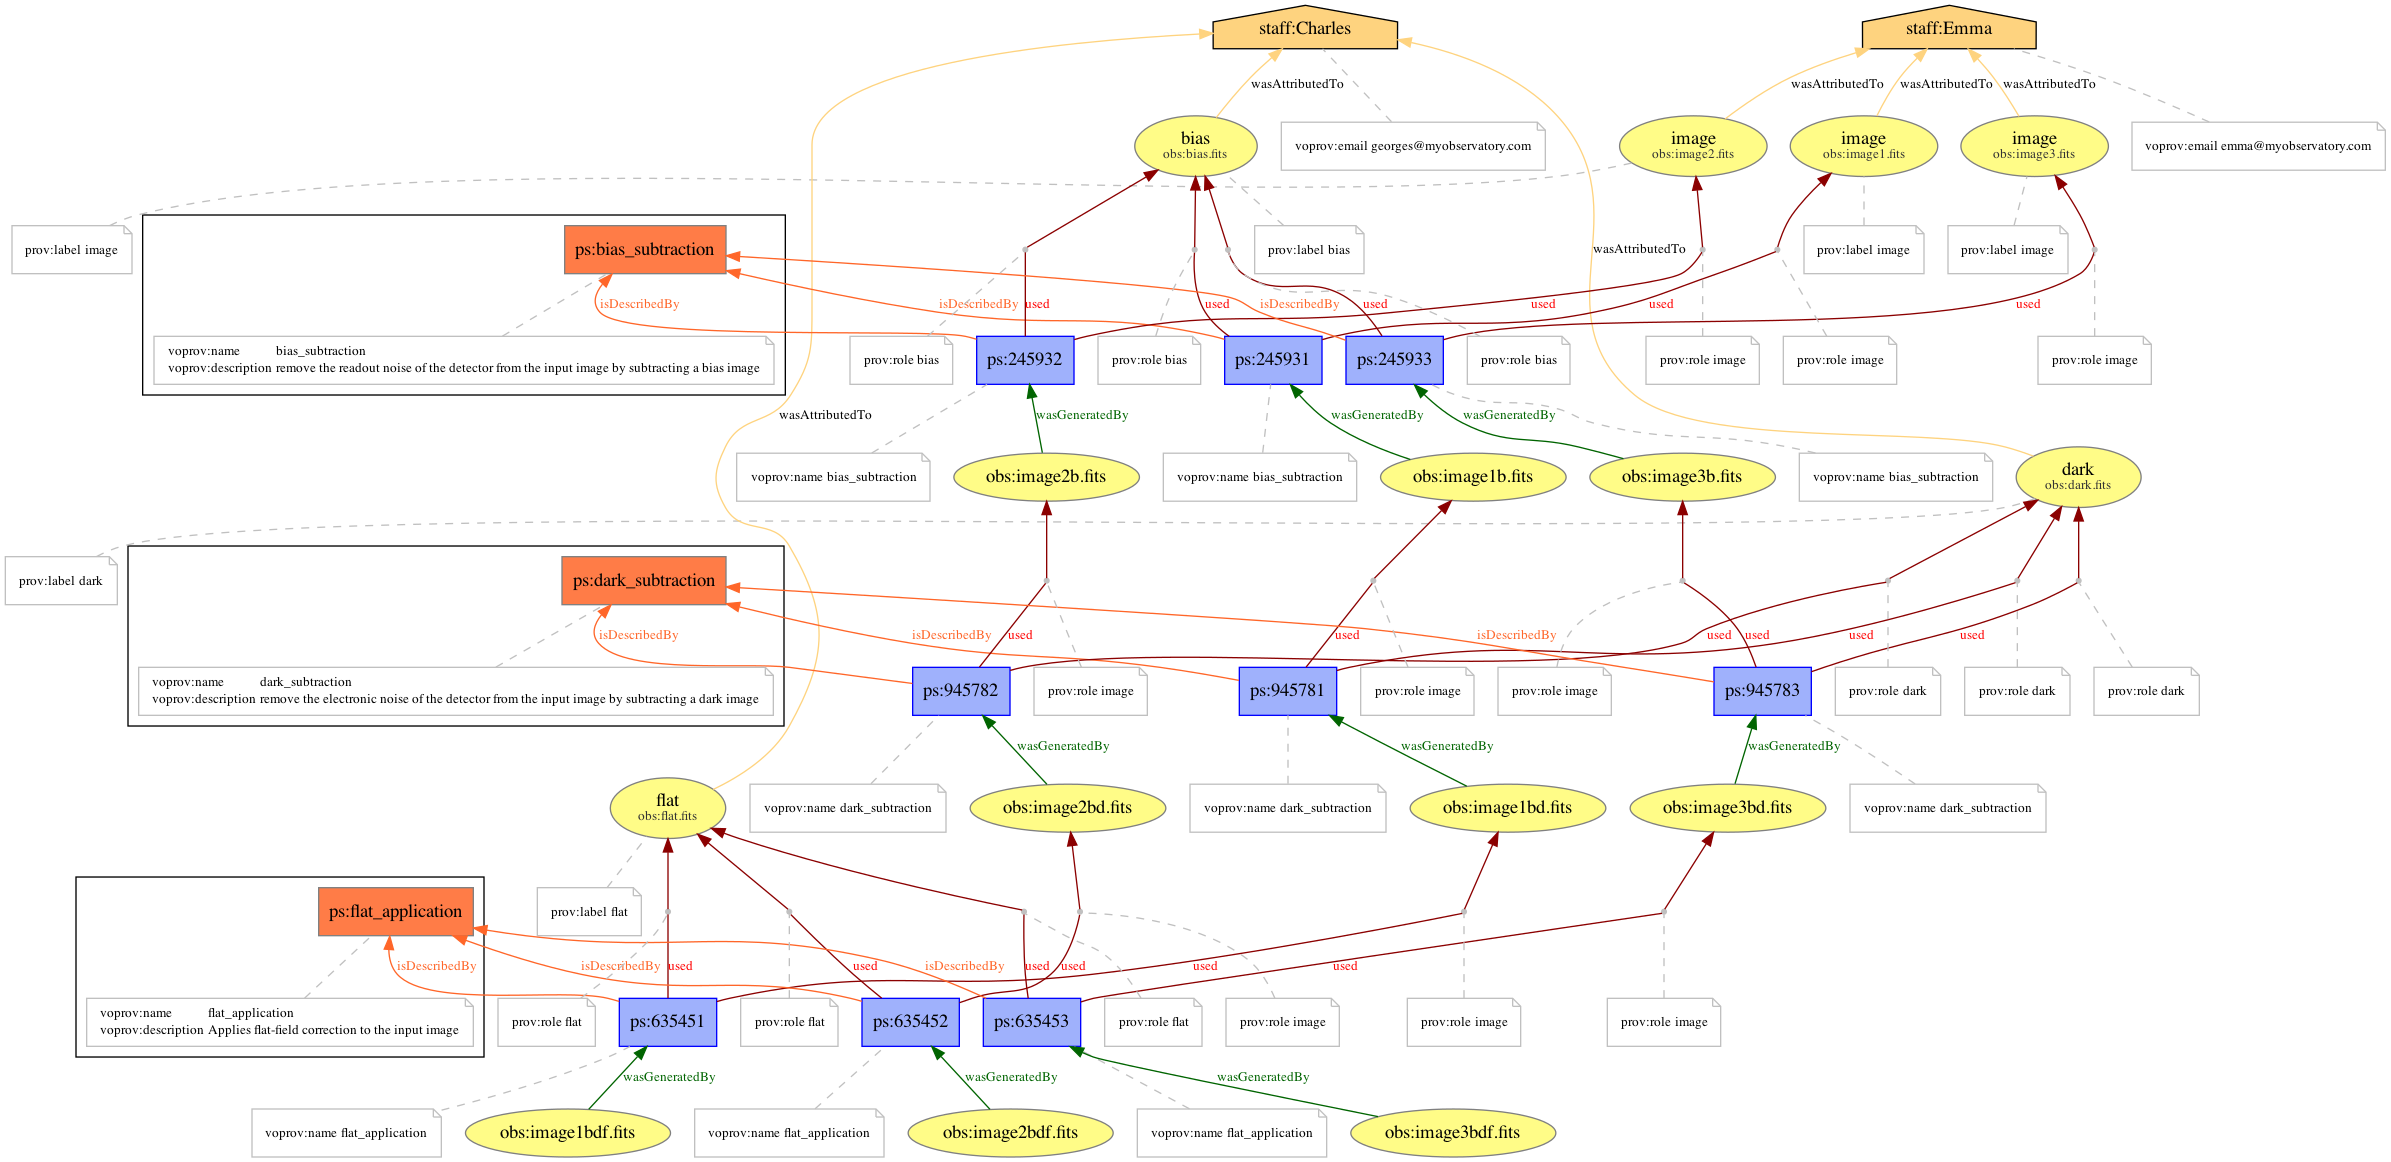

In [22]:
# Show graph
dot = prov_to_dot(pdoc, use_labels=True)  # Important: remove "use_labels=True" in case of error
dot.write_png('voprov_example.png')
Image('voprov_example.png')

The images are then stacked in different ways depending on the configuration parameter of this type of activity:

In [23]:
bundle_stack = pdoc.bundle('#description#stack');
act_stack = bundle_stack.activityDescription(
    'ps:stack', 
    'stack', 
    description="Stack images using method: add, mean, or median"
);

First with method=mean:

In [24]:
actst1 = pdoc.activity('ps:393764', name="stack", activityDescription=act_stack);
actst1.used(im1bdf, attributes={'prov:role': "image"});
actst1.used(im2bdf, attributes={'prov:role': "image"});
actst1.used(im3bdf, attributes={'prov:role': "image"});
imst1 = pdoc.entity('obs:stacked_image_mean.fits');
imst1.wasGeneratedBy(actst1);

In [25]:
bundle_actst1_config = pdoc.bundle('#configuration#393764');
p = bundle_actst1_config.parameter("ps:393764/method", "method", "mean");
pdoc.wasConfiguredBy(actst1, p, "Parameter");

Then with method=median:

In [26]:
actst2 = pdoc.activity('ps:583730', name="stack", activityDescription=act_stack);
actst2.used(im1bdf, attributes={'prov:role': "image"});
actst2.used(im2bdf, attributes={'prov:role': "image"});
actst2.used(im3bdf, attributes={'prov:role': "image"});
imst2 = pdoc.entity('obs:stacked_image_median.fits');
imst2.wasGeneratedBy(actst2);

In [27]:
bundle_actst1_config = pdoc.bundle('#configuration#583730');
p = bundle_actst1_config.parameter("ps:583730/method", "method", "median");
pdoc.wasConfiguredBy(actst2, p, "Parameter");

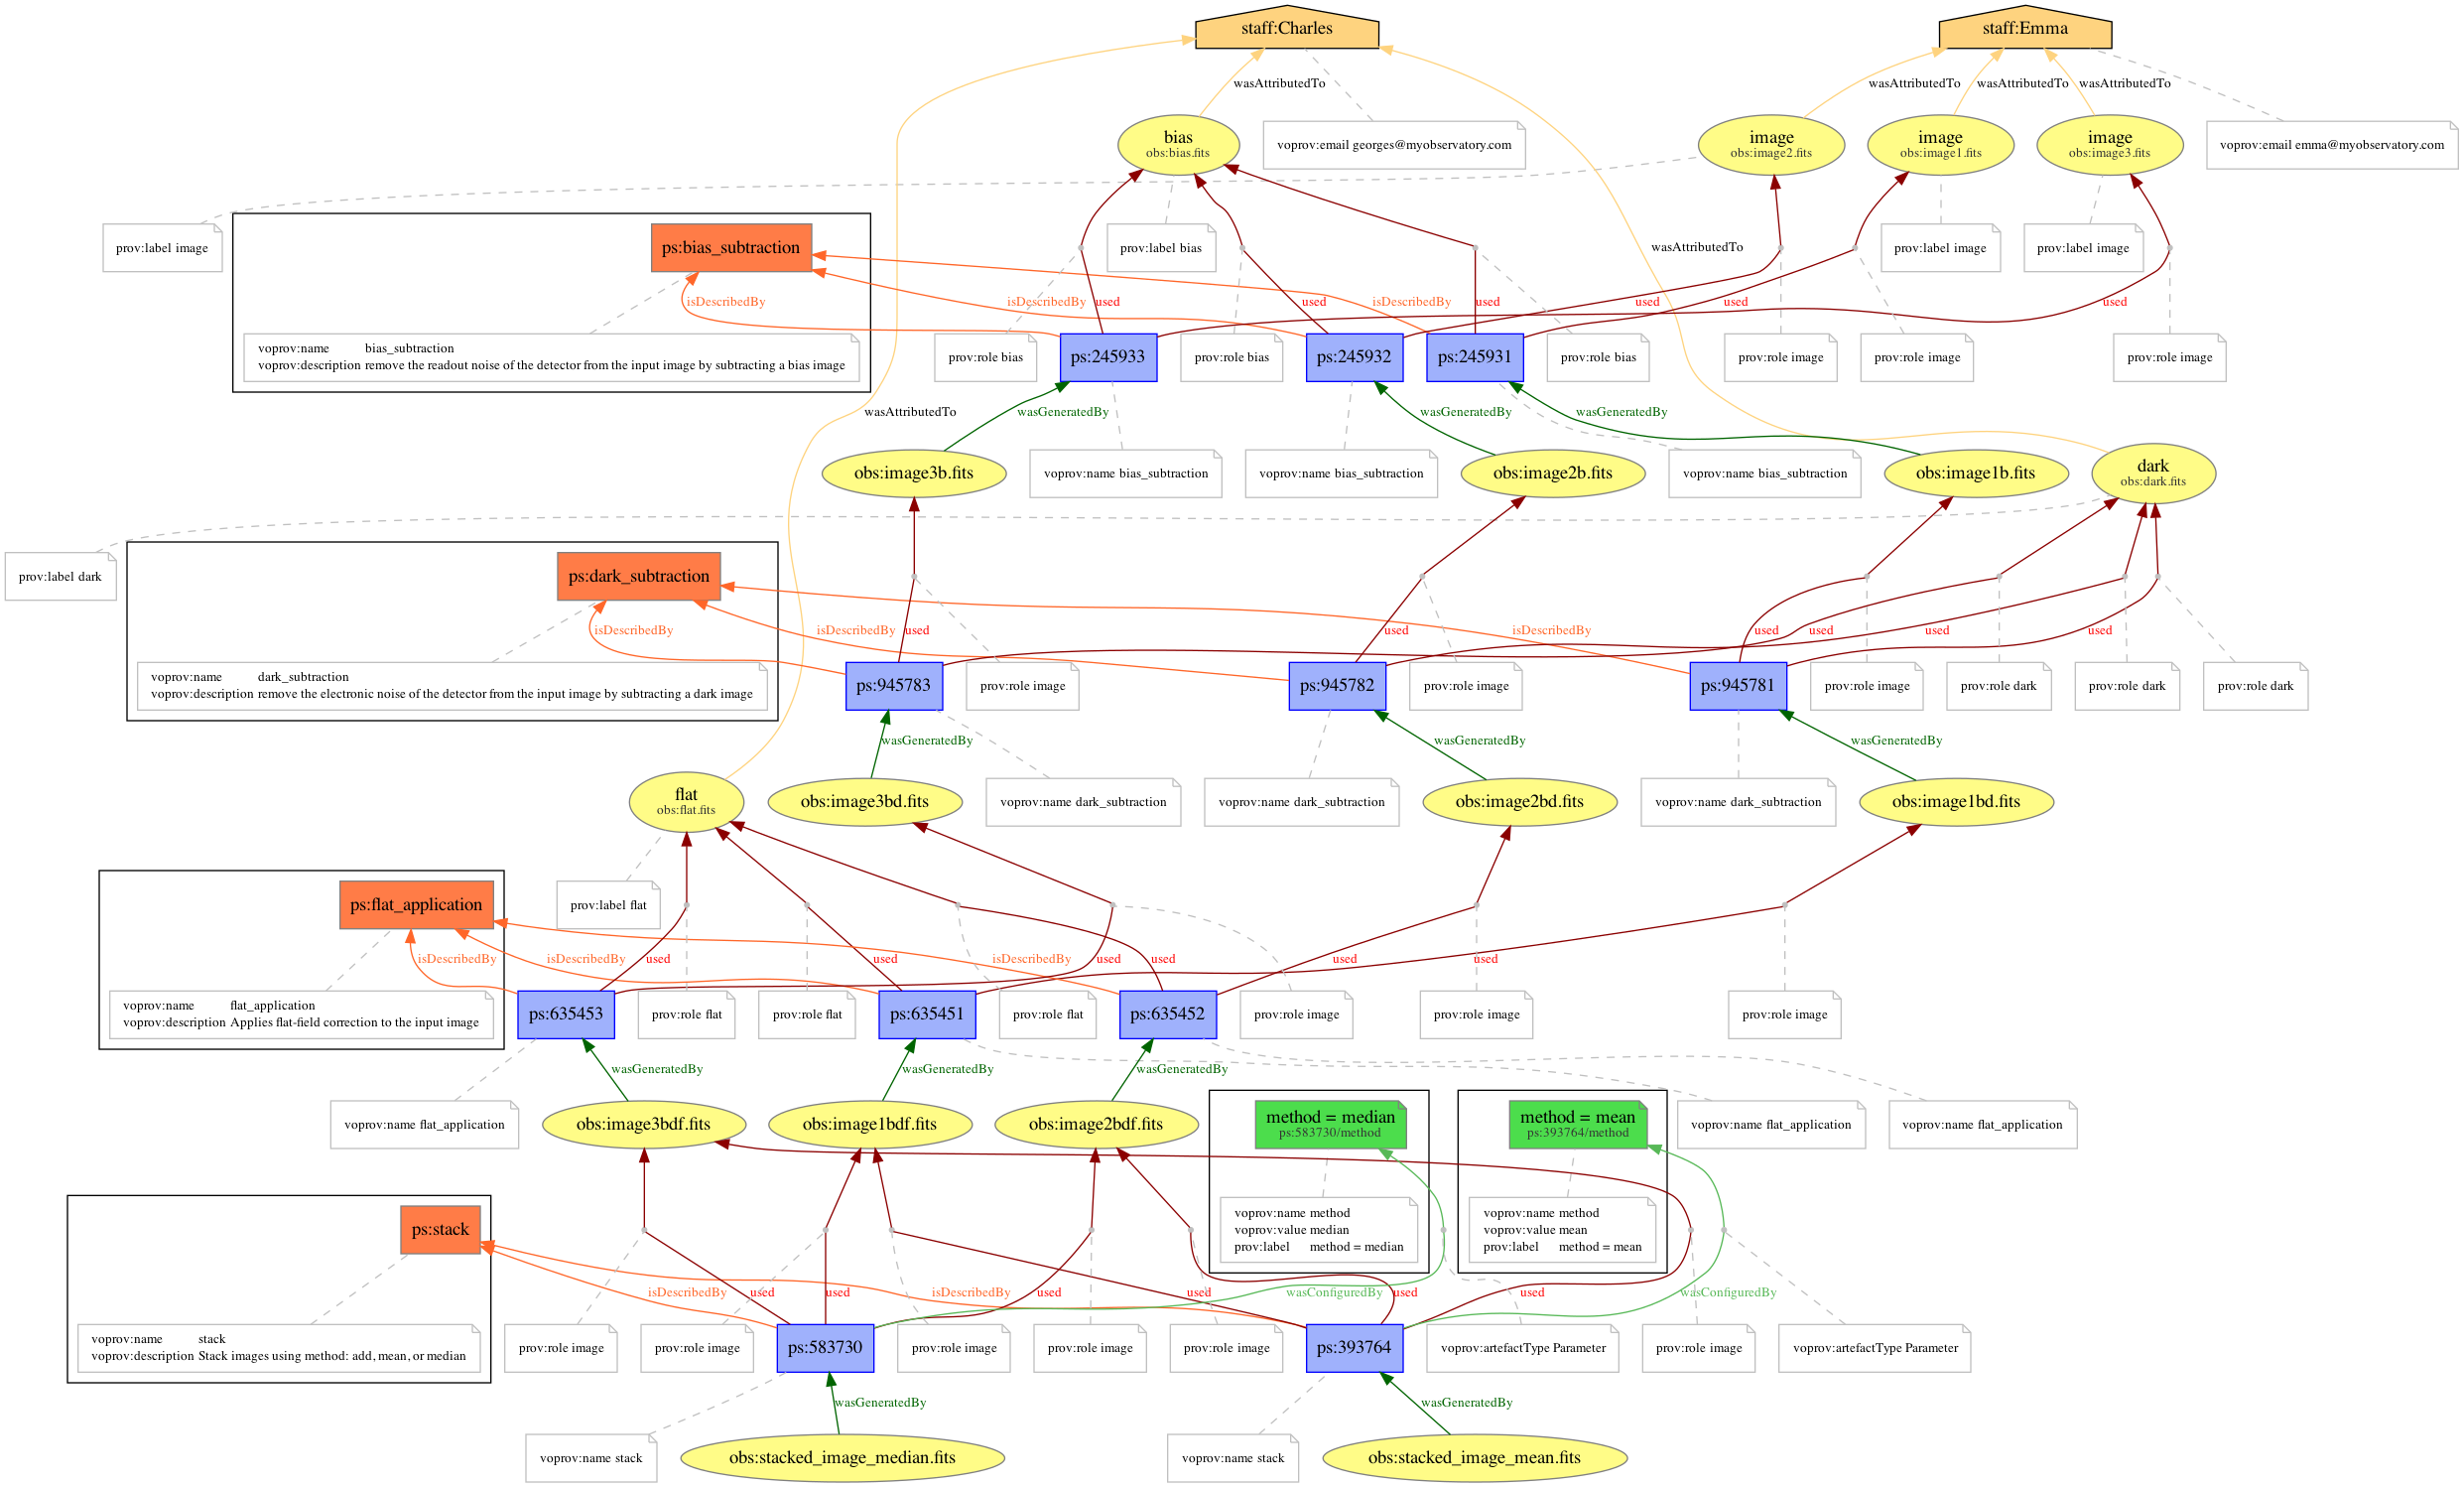

In [28]:
# Show graph
dot = prov_to_dot(pdoc, use_labels=True)  # Important: remove "use_labels=True" in case of error
dot.write_png('voprov_example.png')
Image('voprov_example.png')

In [29]:
pdoc_w3c = pdoc.get_w3c()

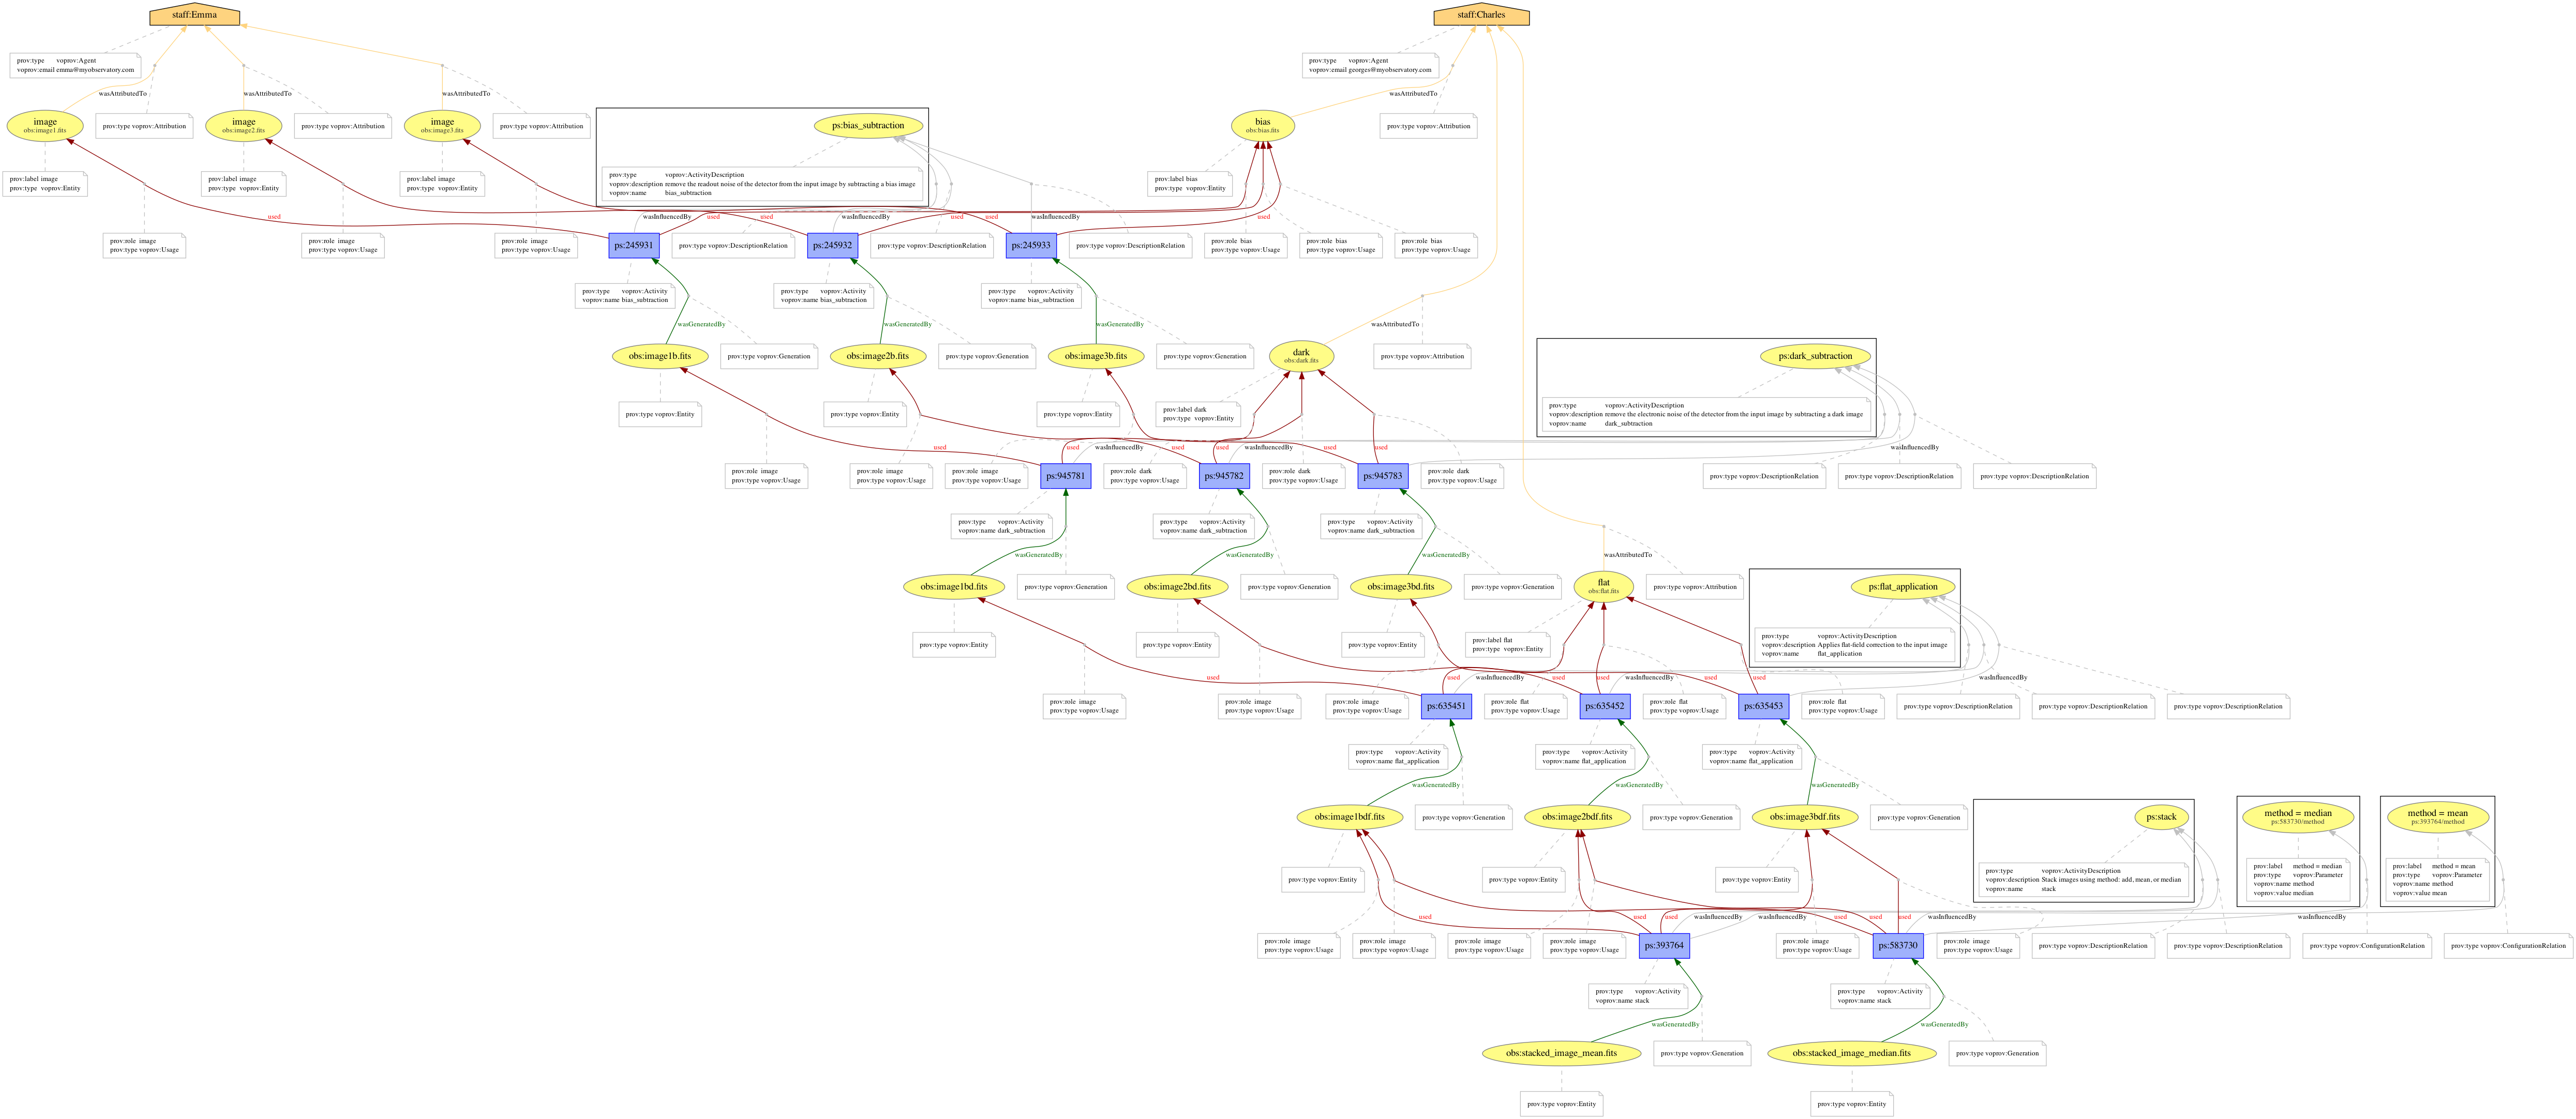

In [30]:
dot = prov_to_dot(pdoc_w3c, use_labels=True)  # Important: remove "use_labels=True" in case of error
dot.write_png('voprov_w3c_example.png')
Image('voprov_w3c_example.png')

In [31]:
for b in pdoc._bundles:
    print(b)

#description#bias_subtraction
#description#dark_subtraction
#description#flat_application
#description#stack
#configuration#393764
#configuration#583730
